## Early takeaways Peishan Li

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'/Users/annie/Desktop'

In [3]:
pd.options.display.max_rows=2000

In [4]:
df=pd.read_csv('/Users/annie/Desktop/luad_tcga_clinical_data.tsv', sep='\t')

### Data overview

In [5]:
len(df)

586

In [6]:
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code.1',
       'Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage',
       'American Joint Committee on Cancer Metastasis Stage Code',
       'American Joint Committee on Cancer Lymph Node Stage Code.1',
       'American Joint Committee on Cancer Lymph Node Stage Code',
       'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
       ...
       'Adjuvant Postoperative Targeted Therapy Administered Indicator',
       'Time between clamping and freezing',
       'Time between excision and freezing', 'Tissue Source Site',
       'TMB (nonsynonymous)', 'Patient Smoking History Category',
       'Primary Therapy Outcome Success Type', 'Tumor Site',
       'Person Neoplasm Status', 'Vial number'],
      dtype='object', length=109)

In [7]:
missing=df.isnull().sum()
missing=missing.to_frame('Missing count').reset_index()
missing=missing.rename(columns={'index': 'Variable name'})
missing
var_list=missing[missing['Missing count']<100]['Variable name'].tolist()
df=df[var_list]
var_list

['Study ID',
 'Patient ID',
 'Sample ID',
 'Diagnosis Age',
 'American Joint Committee on Cancer Metastasis Stage Code',
 'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
 'Neoplasm Disease Stage American Joint Committee on Cancer Code',
 'American Joint Committee on Cancer Publication Version Type',
 'American Joint Committee on Cancer Tumor Stage Code',
 'Cancer Type',
 'Cancer Type Detailed',
 'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
 'Form completion date',
 'Fraction Genome Altered',
 'Neoplasm Histologic Type Name',
 'Neoadjuvant Therapy Type Administered Prior To Resection Text',
 'Prior Cancer Diagnosis Occurence',
 'ICD-10 Classification',
 'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code',
 'International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code',
 'Informed consent verified',
 'Year Cancer Initial Diagnosis',
 'Is FFPE',
 'Oncotree Code',
 

In [8]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,Cancer Type,...,Tissue Retrospective Collection Indicator,Number of Samples Per Patient,Sample Type,Sample type id,Sex,Somatic Status,Tissue Source Site,Patient Smoking History Category,Tumor Site,Vial number
0,luad_tcga,TCGA-05-4244,TCGA-05-4244-01,70.0,M1,N2,Stage IV,6th,T2,Non-Small Cell Lung Cancer,...,YES,1,Primary,1,MALE,Matched,5,4.0,Lung,A
1,luad_tcga,TCGA-05-4245,TCGA-05-4245-01,81.0,M0,N2,Stage IIIA,6th,T2,Non-Small Cell Lung Cancer,...,YES,1,Primary,1,Male,Matched,5,4.0,Lung,A
2,luad_tcga,TCGA-05-4249,TCGA-05-4249-01,67.0,M0,N0,Stage IB,6th,T2,Non-Small Cell Lung Cancer,...,YES,1,Primary,1,Male,Matched,5,3.0,Lung,A
3,luad_tcga,TCGA-05-4250,TCGA-05-4250-01,79.0,M0,N1,Stage IIIA,6th,T3,Non-Small Cell Lung Cancer,...,YES,1,Primary,1,Female,Matched,5,4.0,Lung,A
4,luad_tcga,TCGA-05-4382,TCGA-05-4382-01,68.0,M0,N0,Stage IB,6th,T2,Non-Small Cell Lung Cancer,...,YES,1,Primary,1,Male,Matched,5,4.0,Lung,A


In [9]:
df.describe()

,Diagnosis Age,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Fraction Genome Altered,Year Cancer Initial Diagnosis,Overall Survival (Months),Number of Samples Per Patient,Sample type id,Patient Smoking History Category
count,505.000000,505.0,518.000000,514.000000,515.000000,586.000000,586.000000,510.000000
mean,65.338614,0.0,0.266012,2008.383268,29.739903,1.006826,1.003413,2.813725
std,10.004275,0.0,0.190427,4.163682,29.275243,0.082407,0.058371,1.081460
min,33.000000,0.0,0.000000,1991.000000,0.000000,1.000000,1.000000,1.000000
25%,59.000000,0.0,0.104600,2007.000000,13.685000,1.000000,1.000000,2.000000
50%,66.000000,0.0,0.237800,2010.000000,21.580000,1.000000,1.000000,3.000000
75%,73.000000,0.0,0.400400,2011.000000,37.305000,1.000000,1.000000,4.000000
max,88.000000,0.0,0.801300,2013.000000,238.110000,2.000000,2.000000,5.000000


In [10]:
df.dtypes

Study ID                                                                                        object
Patient ID                                                                                      object
Sample ID                                                                                       object
Diagnosis Age                                                                                  float64
American Joint Committee on Cancer Metastasis Stage Code                                        object
Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code                       object
Neoplasm Disease Stage American Joint Committee on Cancer Code                                  object
American Joint Committee on Cancer Publication Version Type                                     object
American Joint Committee on Cancer Tumor Stage Code                                             object
Cancer Type                                                              

### Overall Survival Status and Time Length (Months)-Potential Target Variable

In [11]:
df.groupby('Overall Survival Status').count()

,Study ID,Patient ID,Sample ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,Cancer Type,...,Tissue Retrospective Collection Indicator,Number of Samples Per Patient,Sample Type,Sample type id,Sex,Somatic Status,Tissue Source Site,Patient Smoking History Category,Tumor Site,Vial number
Overall Survival Status,,,,,,,,,,,,,,,,,,,,,
0:LIVING,336,336,336,324,332,335,330,322,336,336,...,329,336,336,336,336,336,336,332,336,334
1:DECEASED,188,188,188,181,188,188,186,178,188,188,...,188,188,188,188,188,188,188,178,188,188


<AxesSubplot:xlabel='Overall Survival Status', ylabel='count'>

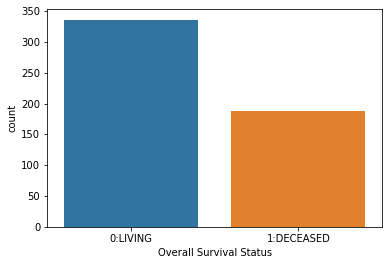

In [12]:
sns.countplot(df['Overall Survival Status'])

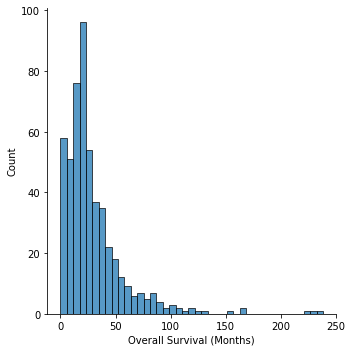

In [29]:
sns.displot(df, x="Overall Survival (Months)")

### Sex and Survival

In [13]:
df.loc[df['Sex']=='MALE', 'Sex']='Male'
df.groupby('Sex').count()

,Study ID,Patient ID,Sample ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,Cancer Type,...,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Number of Samples Per Patient,Sample Type,Sample type id,Somatic Status,Tissue Source Site,Patient Smoking History Category,Tumor Site,Vial number
Sex,,,,,,,,,,,,,,,,,,,,,
Female,280,280,280,270,277,280,277,268,280,280,...,276,276,280,280,280,280,280,273,280,280
Male,244,244,244,235,243,243,239,232,244,244,...,241,241,244,244,244,244,244,237,244,242


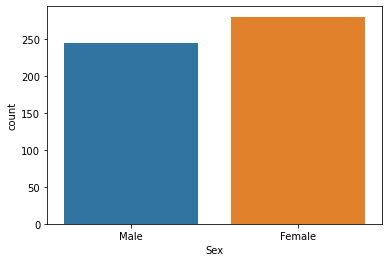

In [14]:
ax=sns.countplot(x="Sex", data=df)

In [15]:
sexsurvival=df[['Study ID', 'Sex','Overall Survival Status']].groupby(['Sex','Overall Survival Status']).size().to_frame(name='Count')
sexsurvival

Count
Sex    Overall Survival Status       
Female 0:LIVING                   182
       1:DECEASED                  98
Male   0:LIVING                   154
       1:DECEASED                  90

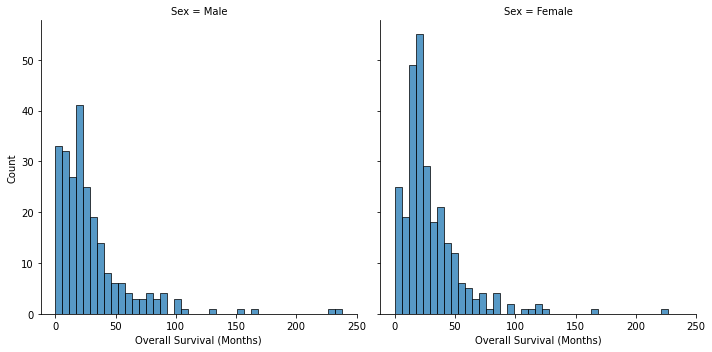

In [17]:
sexsurvivaltime=df[['Study ID', 'Sex','Overall Survival (Months)']]
sns.displot(sexsurvivaltime, x="Overall Survival (Months)", col='Sex')

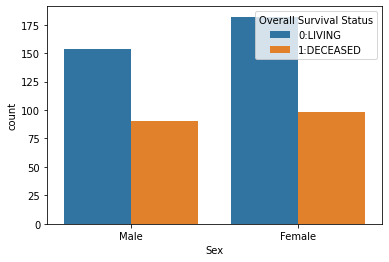

In [18]:
ax=sns.countplot(x="Sex", hue="Overall Survival Status", data=df)
#sexsurvival.plot(kind='bar',stacked=True)

### Smoking History Category

In [19]:
df.groupby('Patient Smoking History Category').count()

,Study ID,Patient ID,Sample ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,Cancer Type,...,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Number of Samples Per Patient,Sample Type,Sample type id,Sex,Somatic Status,Tissue Source Site,Tumor Site,Vial number
Patient Smoking History Category,,,,,,,,,,,,,,,,,,,,,
1.0,76,76,76,71,75,76,76,73,76,76,...,76,76,76,76,76,76,76,76,76,75
2.0,122,122,122,118,121,122,120,118,122,122,...,122,122,122,122,122,122,122,122,122,122
3.0,137,137,137,129,135,136,134,133,137,137,...,134,134,137,137,137,137,137,137,137,137
4.0,171,171,171,169,171,171,169,158,171,171,...,168,168,171,171,171,171,171,171,171,170
5.0,4,4,4,4,4,4,4,4,4,4,...,3,3,4,4,4,4,4,4,4,4


In [20]:
df.groupby(['Sex','Patient Smoking History Category']).count()

Study ID  Patient ID  Sample ID  \
Sex    Patient Smoking History Category                                    
Female 1.0                                     55          55         55   
       2.0                                     53          53         53   
       3.0                                     63          63         63   
       4.0                                    101         101        101   
       5.0                                      1           1          1   
Male   1.0                                     21          21         21   
       2.0                                     69          69         69   
       3.0                                     74          74         74   
       4.0                                     70          70         70   
       5.0                                      3           3          3   

                                         Diagnosis Age  \
Sex    Patient Smoking History Category                  
Female 1.0                                          51   
       2.0                                          50   
       3.0                                          61   
       4.0                                         100   
       5.0                                           1   
Male   1.0                                          20   
       2.0                                          68   
       3.0                                          68   
       4.0                                          69   
       5.0                                           3   

                                         American Joint Committee on Cancer Metastasis Stage Code  \
Sex    Patient Smoking History Category                                                             
Female 1.0                                                                              54          
       2.0                                                                              52          
       3.0                                                                              62          
       4.0                                                                             101          
       5.0                                                                               1          
Male   1.0                                                                              21          
       2.0                                                                              69          
       3.0                                                                              73          
       4.0                                                                              70          
       5.0                                                                               3          

                                         Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code  \
Sex    Patient Smoking History Category                                                                              
Female 1.0                                                                              55                           
       2.0                                                                              53                           
       3.0                                                                              63                           
       4.0                                                                             101                           
       5.0                                                                               1                           
Male   1.0                                                                              21                           
       2.0                                                                              69                           
       3.0                                                                              73                           
       4.0                            

In [21]:
smokesurvival=df[['Study ID', 'Patient Smoking History Category','Overall Survival Status']].groupby(['Patient Smoking History Category','Overall Survival Status']).size().to_frame(name='Count')
smokesurvival

Count
Patient Smoking History Category Overall Survival Status       
1.0                              0:LIVING                    48
                                 1:DECEASED                  28
2.0                              0:LIVING                    79
                                 1:DECEASED                  43
3.0                              0:LIVING                    95
                                 1:DECEASED                  42
4.0                              0:LIVING                   107
                                 1:DECEASED                  64
5.0                              0:LIVING                     3
                                 1:DECEASED                   1

### Diagnosis Age

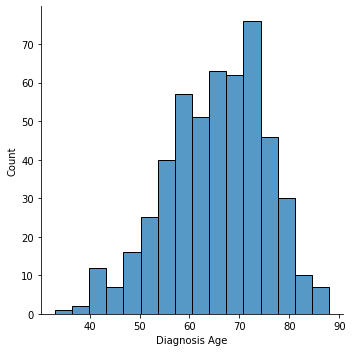

In [22]:
sns.displot(df['Diagnosis Age'])

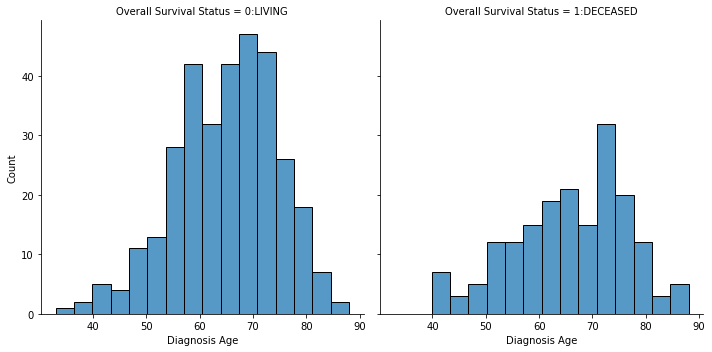

In [23]:
sns.displot(df, x="Diagnosis Age", col='Overall Survival Status')

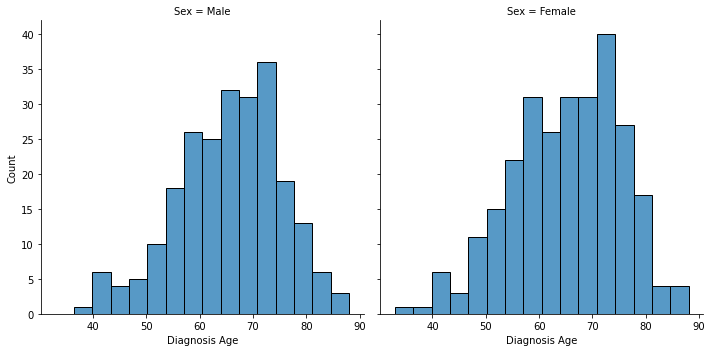

In [24]:
sns.displot(df, x="Diagnosis Age", col='Sex')

In [25]:
df.groupby('Sex')['Diagnosis Age'].mean()

Sex
Female    65.166667
Male      65.536170
Name: Diagnosis Age, dtype: float64

In [27]:
df.groupby('Overall Survival Status')['Diagnosis Age'].mean()

Overall Survival Status
0:LIVING      65.111111
1:DECEASED    65.745856
Name: Diagnosis Age, dtype: float64

### Prior Cancer Diagonosis Occurence

In [30]:
df['Prior Cancer Diagnosis Occurence'].unique()

array(['No', 'Yes', nan, 'Yes, History of Prior Malignancy',
       'Yes, History of Synchronous/Bilateral Malignancy'], dtype=object)

In [31]:
df.loc[df['Prior Cancer Diagnosis Occurence']=='Yes, History of Prior Malignancy', 'Prior Cancer Diagnosis Occurence']='Yes'
df.loc[df['Prior Cancer Diagnosis Occurence']=='Yes, History of Synchronous/Bilateral Malignancy', 'Prior Cancer Diagnosis Occurence']='Yes'
df['Prior Cancer Diagnosis Occurence'].unique()

array(['No', 'Yes', nan], dtype=object)

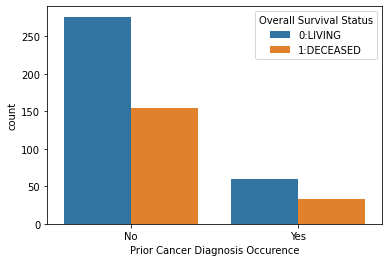

In [32]:
ax=sns.countplot(x="Prior Cancer Diagnosis Occurence", hue="Overall Survival Status", data=df)

In [36]:
priorsurvival=df[['Study ID', 'Prior Cancer Diagnosis Occurence','Overall Survival Status']].groupby(['Prior Cancer Diagnosis Occurence','Overall Survival Status']).size().to_frame(name='Count')
priorsurvival

Count
Prior Cancer Diagnosis Occurence Overall Survival Status       
No                               0:LIVING                   276
                                 1:DECEASED                 155
Yes                              0:LIVING                    60
                                 1:DECEASED                  33

In [33]:
df['Patient Primary Tumor Site'].unique()

array(['R-Lower', 'L-Upper', 'R-Upper', 'R-Middle', 'L-Lower', nan,
       'Other (please specify)'], dtype=object)

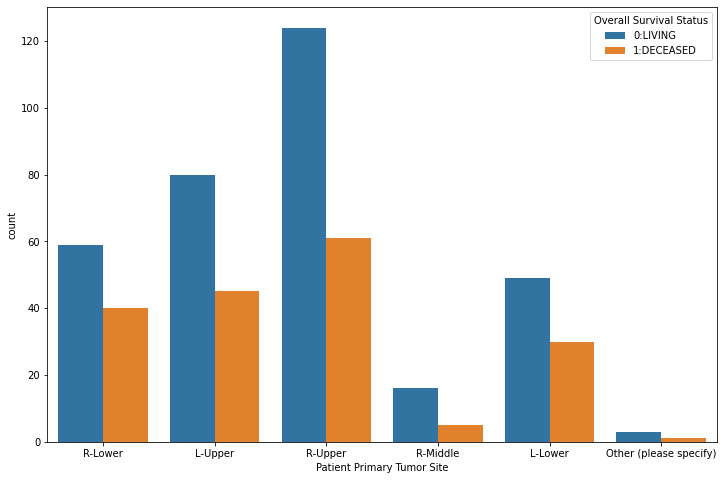

In [35]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="Patient Primary Tumor Site", hue="Overall Survival Status", data=df)

In [37]:
sitesurvival=df[['Study ID', 'Patient Primary Tumor Site','Overall Survival Status']].groupby(['Patient Primary Tumor Site','Overall Survival Status']).size().to_frame(name='Count')
sitesurvival

Count
Patient Primary Tumor Site Overall Survival Status       
L-Lower                    0:LIVING                    49
                           1:DECEASED                  30
L-Upper                    0:LIVING                    80
                           1:DECEASED                  45
Other (please specify)     0:LIVING                     3
                           1:DECEASED                   1
R-Lower                    0:LIVING                    59
                           1:DECEASED                  40
R-Middle                   0:LIVING                    16
                           1:DECEASED                   5
R-Upper                    0:LIVING                   124
                           1:DECEASED                  61

In [39]:
print(49/79)
print(80/125)
print(3/4)
print(59/99)
print(16/21)
print(124/185)

0.620253164556962
0.64
0.75
0.5959595959595959
0.7619047619047619
0.6702702702702703
